In [47]:
import sympy

In [48]:
sympy.init_printing()

In [79]:
from sympy.solvers.ode.systems import dsolve_system
from sympy.solvers.pde import pdsolve

In [93]:
x, t = sympy.symbols('x t')
v = sympy.Function('v')
Pi = sympy.Function('Pi')

# for differencing systems
v1 = sympy.Function('v1') 
v2 = sympy.Function('v2')
Pi1 = sympy.Function('Pi1')
Pi2 = sympy.Function('Pi2')

zeta = sympy.symbols('zeta', positive=True)
tau_Pi = sympy.symbols('tau_Pi', positive=True)
U, eta = sympy.symbols('U eta')
#U = 0
#tau_Pi, zeta = 1, 1

In [51]:
import numpy as np
from scipy.optimize import brentq, newton, minimize_scalar
from scipy.integrate import solve_ivp, solve_bvp
from scipy.special import erf
import matplotlib.pyplot as plt

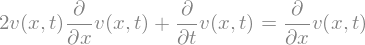

In [52]:
toy_bulk_limit = sympy.Eq(v(x,t).diff(t) + 2*v(x,t)*v(x,t).diff(x), zeta*v(x,t).diff(x))
toy_bulk_limit

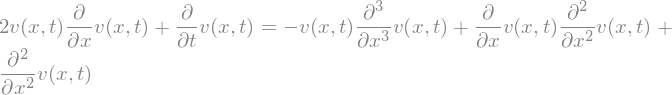

In [53]:
toy_bulk_CE = sympy.Eq(v(x,t).diff(t) + 2*v(x,t)*v(x,t).diff(x), zeta*v(x,t).diff(x,2) + tau_Pi*zeta*(v(x,t).diff(x)*v(x,t).diff(x,2) - v(x,t)*v(x,t).diff(x,3)) )
toy_bulk_CE

In [89]:
# result = pdsolve(toy_bulk_limit)

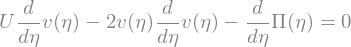

In [101]:
eq_213a_eta = sympy.Eq(U*v(eta).diff(eta),2*v(eta)*v(eta).diff(eta) + Pi(eta).diff(eta))
expr_213a_eta = U*v(eta).diff(eta) - 2*v(eta)*v(eta).diff(eta) - Pi(eta).diff(eta)
eq_213a_eta

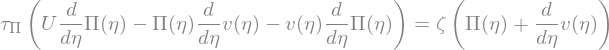

In [107]:
eq_213b_eta = sympy.Eq(tau_Pi*(U*Pi(eta).diff(eta) - Pi(eta)*v(eta).diff(eta) - v(eta)*Pi(eta).diff(eta)),
                       zeta*(v(eta).diff(eta) + Pi(eta)))
expr_213b_eta = tau_Pi*(U*Pi(eta).diff(eta) - Pi(eta)*v(eta).diff(eta) - v(eta)*Pi(eta).diff(eta)) - zeta*(v(eta).diff(eta) + Pi(eta))

eq_213b_eta

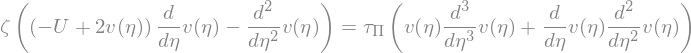

In [104]:
eq_216_eta = sympy.Eq(zeta*((2*v(eta) - U)*v(eta).diff(eta) - v(eta).diff(eta,2)), tau_Pi*(v(eta).diff(eta)*v(eta).diff(eta,2)
                                                                                          + v(eta)*v(eta).diff(eta,3)))
expr_216_eta = zeta*((2*v(eta) - U)*v(eta).diff(eta) - v(eta).diff(eta,2)) - tau_Pi*(v(eta).diff(eta)*v(eta).diff(eta,2)
                                                                                          + v(eta)*v(eta).diff(eta,3))
eq_216_eta

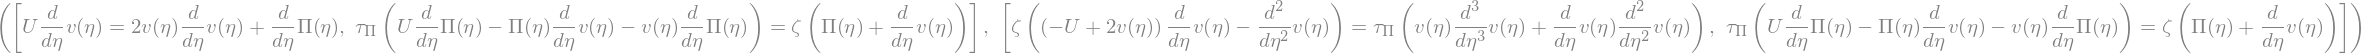

In [113]:
sys1 = [eq_213a_eta, eq_213b_eta]
sys2 = [eq_216_eta, eq_213b_eta]
sys1, sys2

In [58]:
# sys_diff = [eq_213a_eta - eq_213a_eta, eq_213b_eta - eq_216_eta]
# sys_diff ... nope

In [59]:
vars = [v(eta),Pi(eta)]
vars

In [116]:
# result = dsolve_system(sys1, vars, t=eta)

In [62]:
print("Wavespeeds for sys1 are given by (3v/2)+_sqrt((v/2)**2 + Pi + (zeta/tauPi))")

Wavespeeds for sys1 are given by (3v/2)+_sqrt((v/2)**2 + Pi + (zeta/tauPi))


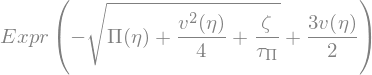

In [78]:
wavespeeds = sympy.Expr(3*v(eta)/2 +- sympy.sqrt((v(eta)/2)**2 + Pi(eta) + (zeta/tau_Pi)))
wavespeeds

In [91]:
print("Cannot solve systems independently and simple differencing doesn't work so going to make substitutions for " 
      "v=v1 or v2, Pi=Pi1 or Pi2 etc. and at present keep U1=U2")

Cannot solve systems independently and simple differencing doesn't work so going to make substitutions for v=v1 or v2, Pi=Pi1 or Pi2 etc. and at present keep U1=U2


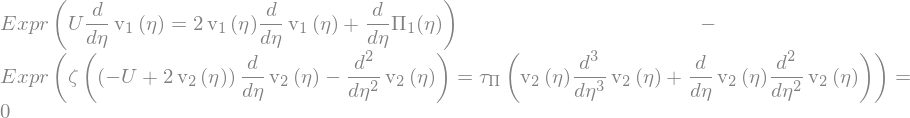

In [117]:
sympy.Eq(sympy.Expr(eq_213a_eta.subs(v(eta),v1(eta)).subs(Pi(eta),Pi1(eta))) - sympy.Expr(eq_216_eta.subs(v(eta),v2(eta)).subs(Pi(eta),Pi2(eta))))

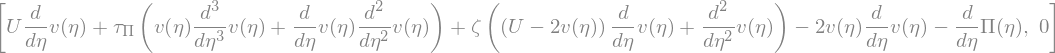

In [118]:
sys_diff = [(expr_213a_eta - expr_216_eta).simplify(),
            (expr_213b_eta - expr_213b_eta).simplify()]
sys_diff

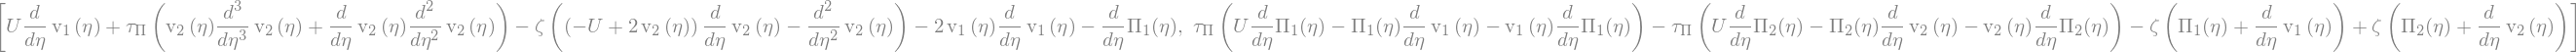

In [119]:
sys_diff = [expr_213a_eta.subs(v(eta),v1(eta)).subs(Pi(eta),Pi1(eta)) - expr_216_eta.subs(v(eta),v2(eta)).subs(Pi(eta),Pi2(eta)),
            expr_213b_eta.subs(v(eta),v1(eta)).subs(Pi(eta),Pi1(eta)) - expr_213b_eta.subs(v(eta),v2(eta)).subs(Pi(eta),Pi2(eta))]
sys_diff